In [63]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [64]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [65]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [66]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [67]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)


In [68]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [69]:
# Save references to each table
Measurement = Base.classes.measurement

Station = Base.classes.station

In [70]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [8]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [9]:
#Earlirst Date 
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01',)

In [22]:
#Selecting one year from the last date in the data set
last_year = session.query(Measurement.date).\
    filter(Measurement.date > '2016-08-22').\
    order_by(Measurement.date).first()
last_year

('2016-08-23',)

In [11]:
#Alternative selecting one year from the last date in the data set
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("One year ago date: ", query_date)

One year ago date:  2016-08-23


In [12]:
# Performing a query to retrieve precipitation scores
precipitation_scores = session.query(Measurement.date,Measurement.prcp).\
                            filter(Measurement.date > '2016-08-22').\
                            order_by(Measurement.date).all()

In [13]:
#Saving the query results as a Panda Data Frame 
percipitaion_df = pd.DataFrame(data=precipitation_scores)
percipitaion_df.columns=['Date','Precipitation']
percipitaion_df.head()

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


In [14]:
# Sorting the dataframe by date
percipitaion_df.sort_values(by='Date')

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2228,2017-08-23,0.08
2226,2017-08-23,0.00
2227,2017-08-23,0.00


<Axes: xlabel='Date', ylabel='Inches'>

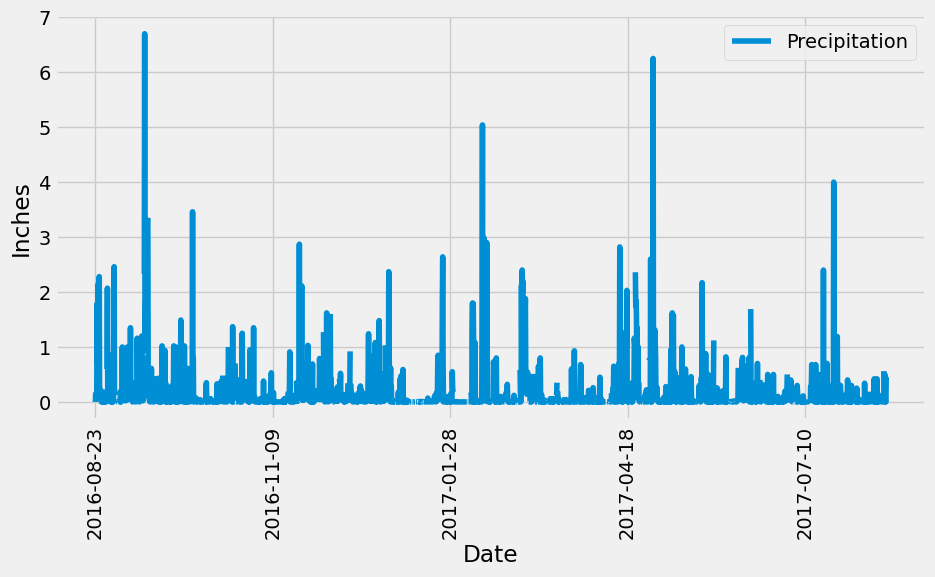

In [34]:
#Plotting bar graph with percipitaion_df
percipitaion_df = pd.DataFrame(precipitation_scores, columns=['Date','Precipitation'])

#Sorting and setting our index in order to plot 
percipitaion_df.sort_values('Date',inplace=True)
percipitaion_df.set_index('Date',inplace=True)

#Plotting percipitaion_df
percipitaion_df.plot(figsize=(10,5), rot=90, grid=True, ylabel = 'Inches')
                                                   
        

In [35]:
#First attempt at trying to plot the df but didn't work as planned 

#Ploting using Pandas Plotting with Matplotlib to plot the data 
#ax = percipitaion_df.plot.bar(x='Date', y='Precipitation')

#sorting and setting index 
#percipitaion_df.sort_values(by='Date')
#percipitaion_df.set_index('Date',inplace=True)

#percipitaion_df.plot(figsize=(10,10), rot=90)

#selected_xValues = [1,365,1115,1800, 2229]
#x_values = range(len(percipitaion_df))

#x_labels = percipitaion_df['Date'].tolist()

#plt.xticks(selected_xValues, [x_labels[i] for i in selected_xValues])


#plt.show()

In [36]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [37]:
# Use Pandas to calculate the summary statistics for the precipitation data
percipitaion_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [38]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Measurement.station).distinct().count()
station_count

9

In [39]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

#Realized I did this incorrectly but used it to get the correct query output 
station_count = session.query(Measurement.station).order_by(Measurement.station)

station_count_df = pd.DataFrame(data=station_count)
station_count_df.columns=['Station']

station_count_df.value_counts()


Station    
USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
dtype: int64

In [40]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
station_count = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station)).all()
station_count

[('USC00518838', 511),
 ('USC00517948', 1372),
 ('USC00511918', 1979),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00519523', 2669),
 ('USC00513117', 2709),
 ('USC00519397', 2724),
 ('USC00519281', 2772)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

In [77]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = session.query(Measurement.station,Measurement.date,Measurement.tobs).\
    filter(Measurement.station == 'USC00519281')

min_values = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').scalar()
max_values = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').scalar()
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').scalar()

print(f"Mininmum value : {min_values}")
print(f"Maximum value : {max_values}")
print(f"Average value : {avg_temp}")

Mininmum value : 54.0
Maximum value : 85.0
Average value : 71.66378066378067


In [78]:
most_active_station.all()

[('USC00519281', '2010-01-01', 70.0),
 ('USC00519281', '2010-01-02', 62.0),
 ('USC00519281', '2010-01-03', 74.0),
 ('USC00519281', '2010-01-04', 75.0),
 ('USC00519281', '2010-01-05', 74.0),
 ('USC00519281', '2010-01-06', 76.0),
 ('USC00519281', '2010-01-07', 69.0),
 ('USC00519281', '2010-01-08', 66.0),
 ('USC00519281', '2010-01-09', 70.0),
 ('USC00519281', '2010-01-10', 75.0),
 ('USC00519281', '2010-01-11', 64.0),
 ('USC00519281', '2010-01-12', 60.0),
 ('USC00519281', '2010-01-13', 61.0),
 ('USC00519281', '2010-01-14', 68.0),
 ('USC00519281', '2010-01-15', 64.0),
 ('USC00519281', '2010-01-16', 66.0),
 ('USC00519281', '2010-01-17', 67.0),
 ('USC00519281', '2010-01-18', 70.0),
 ('USC00519281', '2010-01-19', 67.0),
 ('USC00519281', '2010-01-20', 67.0),
 ('USC00519281', '2010-01-21', 69.0),
 ('USC00519281', '2010-01-22', 60.0),
 ('USC00519281', '2010-01-23', 75.0),
 ('USC00519281', '2010-01-24', 75.0),
 ('USC00519281', '2010-01-25', 65.0),
 ('USC00519281', '2010-01-26', 75.0),
 ('USC005192

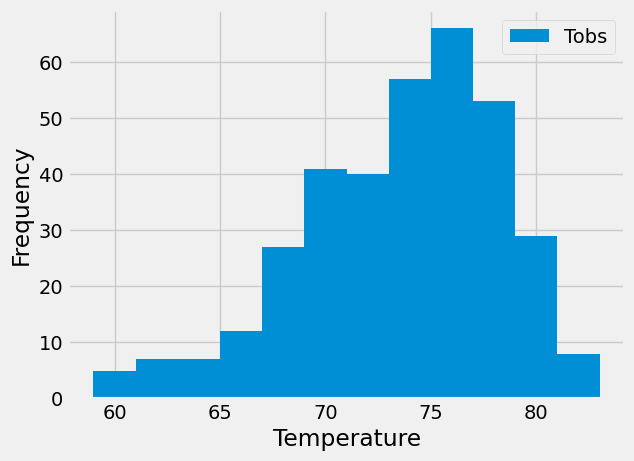

In [61]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_recent_months = session.query(Measurement.station,Measurement.date,Measurement.tobs,).\
                            filter(Measurement.date > '2016-08-22').\
                            filter(Measurement.station == 'USC00519281').\
                            order_by(Measurement.date).all()

most_active_station_df= pd.DataFrame(most_recent_months, columns=['Date','Precipitation','Tobs'])

most_active_station_df.sort_values(by='Date',inplace=True)
most_active_station_df.set_index('Date',inplace=True)

plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.hist(most_active_station_df['Tobs'],bins=12)      
plt.legend(['Tobs'])
plt.show()

In [60]:
# Close Session
session.close()